In [1]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 2.0MB/s 
     |████████████████████████████████| 3.1MB 39.3MB/s 
     |████████████████████████████████| 501kB 38.0MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

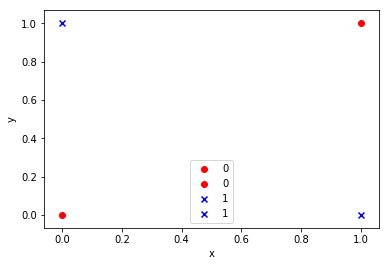

In [3]:
x_data = np.array([[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]])
y_data = np.array([[0.],
          [1.],
          [1.],
          [0.]])

plt.scatter(x_data[0, 0], x_data[0, 1],color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1],color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1],color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1],color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower center')
plt.show()


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(x_data, y_data, epochs=100)

W0723 10:36:46.040816 139811945797504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4 samples
Epoch 1/100
4/4 [==============================] - 0s 20ms/sample - loss: 0.7735 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 891us/sample - loss: 0.7727 - accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 403us/sample - loss: 0.7721 - accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 0s 545us/sample - loss: 0.7716 - accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 629us/sample - loss: 0.7712 - accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 0s 365us/sample - loss: 0.7709 - accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 0s 526us/sample - loss: 0.7705 - accuracy: 0.5000
Epoch 8/100
4/4 [==============================] - 0s 776us/sample - loss: 0.7702 - accuracy: 0.5000
Epoch 9/100
4/4 [==============================] - 0s 547us/sample - loss: 0.7699 - accuracy: 0.5000
Epoch 10/100
4/4 [==============================] - 0s 612us/sample - los

In [0]:
score = model.evaluate(x_data, y_data, verbose=0)

In [7]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.7521379590034485
Test accuracy: 0.5


dict_keys(['loss', 'accuracy'])


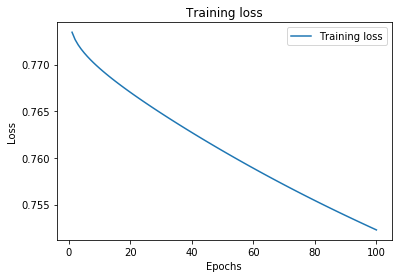

In [8]:
history_dict = history.history
print(history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

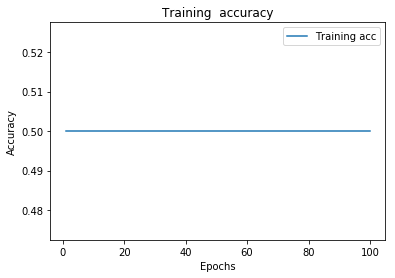

In [9]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']

plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


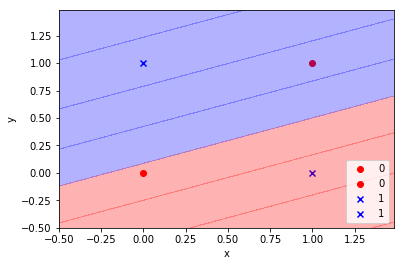

In [10]:
plt.scatter(x_data[0, 0], x_data[0, 1],color='red', marker='o', label='0')
plt.scatter(x_data[3, 0], x_data[3, 1],color='red', marker='o', label='0')
plt.scatter(x_data[1, 0], x_data[1, 1],color='blue', marker='x', label='1')
plt.scatter(x_data[2, 0], x_data[2, 1],color='blue', marker='x', label='1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')

resolution=0.02
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
x1_min, x1_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
x2_min, x2_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.show()